# Analysing and plotting genetic allele frequency data using pandas, seaborn and matplotlib

In [2]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from upsetplot import plot

In [91]:
# Set constants and functions

home_path = str(os.path.dirname(os.getcwd()))
population_clusters = ["SUPER","SUB"]

gene_location_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "locations.csv"))
genes = gene_location_df.location_name

sample_info_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "samples.csv"))
sub_populations = sample_info_df.SUB.unique()

## Set figure area and font size
sns.set(rc={"figure.figsize": (12, 10)})
SMALL_font = 8
MEDIUM_font = 10
BIGGER_font = 16

## Create barplot of variant count per gene

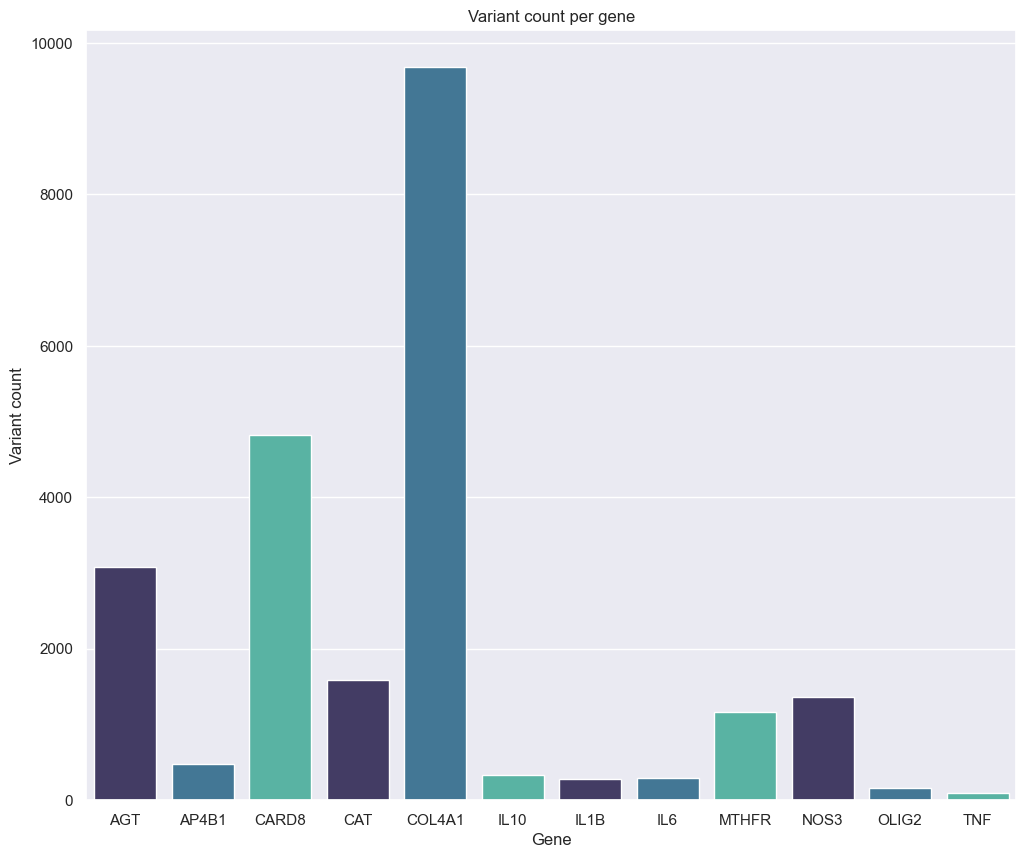

In [92]:
# Generate barplot of variant count per gene

# Import allele count data as pandas dataframe, calculate reference allele counts (reference allele count = total observed count - alternate allele count) and format dataframe correctly
collated_count_data = pd.DataFrame()
for gene in genes:
    allele_count_path = os.path.join(home_path,"Data", "SUPER", "ALL_{}.AFR.acount".format(gene))
    if os.path.exists(allele_count_path):
        allele_count_df = pd.read_csv(allele_count_path, sep="\t")
        allele_count_df["REF_CTS"] = allele_count_df["OBS_CT"] - allele_count_df["ALT_CTS"]
        allele_count_df["GENE"] = gene
    collated_count_data = pd.concat([collated_count_data, allele_count_df])

collated_count_data

# Count unique variants for each gene and sub-population
collated_count_grouped = pd.DataFrame(collated_count_data.groupby(["GENE"]).count()["ID"].reset_index().rename(columns={"ID":"COUNT"}))

# Create barplot
custom_palette = sns.color_palette("mako", 3)
variant_barplot = sns.barplot(
    x="GENE",
    y="COUNT",
    data=collated_count_grouped,
    palette=custom_palette,
)

variant_barplot.set_ylabel("Variant count")
variant_barplot.set_xlabel("Gene")

plt.title(label="Variant count per gene")
plt.rc('font', size=SMALL_font)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_font)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_font)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_font)  # fontsize of the figure title
plt.show()

## Create stacked barplot of variant consequences per gene

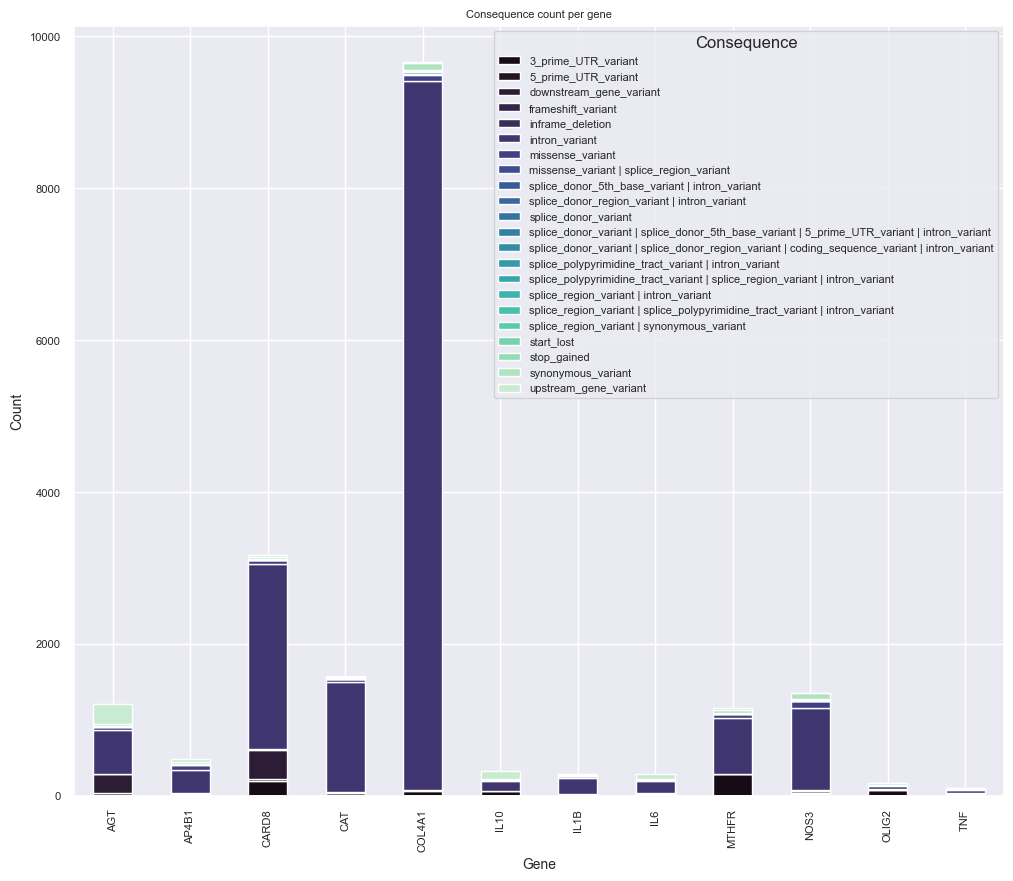

In [123]:
# Import variant consequence information for each gene and append to a single dataframe 

collated_VEP_data = pd.DataFrame()
for gene in genes:
    gene_VEP_path = os.path.join(home_path,"Data", "Supplementary Table", "SUPER", "{}_VEP.csv".format(gene))
    consequence_df = pd.DataFrame()
    if os.path.exists(gene_VEP_path):
        consequence_df = pd.read_csv(gene_VEP_path, sep="\t")[["ID", "POS", "REF", "ALT", "Consequence"]]
        consequence_df["GENE"] = gene
    collated_VEP_data = pd.concat([collated_VEP_data, consequence_df])

# Count unique variants for each gene and sub-population
collated_VEP_data_grouped = pd.DataFrame(collated_VEP_data.groupby(["GENE","Consequence"]).count()["ID"].reset_index().rename(columns={"ID":"COUNT"}))
collated_VEP_pivot = collated_VEP_data_grouped.pivot(index="GENE", columns="Consequence", values="COUNT")

# Create barplot
custom_palette = sns.color_palette("mako", 22)
consequence_plot = collated_VEP_pivot.plot(
    kind="bar",
    stacked = True,
    color=custom_palette,
)

consequence_plot.set_ylabel("Count")
consequence_plot.set_xlabel("Gene")

plt.title(label="Consequence count per gene")
plt.rc('font', size=SMALL_font)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_font)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_font)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_font)  # fontsize of the figure title
plt.show()

## Generate scatter plot of predicted variant effect vs allele frequency

In [124]:
# Import allele frequency data
collated_af_data = pd.DataFrame()
for gene in genes:
    gene_af_path = os.path.join(home_path,"Data", "Supplementary Table", "SUPER", "{}_Freq.csv".format(gene))
    af_df = pd.DataFrame()
    if os.path.exists(gene_af_path):
        af_df = pd.read_csv(gene_af_path, sep="\t")[["ID", "POS", "REF", "ALT", "AFR"]]
        af_df["GENE"] = gene
    collated_af_data = pd.concat([collated_af_data, af_df])

collated_af_data   


,ID,POS,REF,ALT,AFR,GENE
0,rs1185300901,110148882,C,CT,0.000000,COL4A1
1,rs552586867,110148891,C,G,0.000662,COL4A1
2,rs59409892,110148917,C,G,0.097351,COL4A1
3,rs535182970,110148920,G,C,0.000662,COL4A1
4,rs56406633,110148959,A,G,0.000662,COL4A1
...,...,...,...,...,...,...
158,rs981058453,33029149,C,T,0.000662,OLIG2
159,rs182058038,33029193,T,A,0.005960,OLIG2
160,rs7278343,33029257,A,G,0.249669,OLIG2
161,rs151281307,33029262,AT,A,0.002649,OLIG2
